### Students Math Class

Questions:
1. How are students performing in their math classes?
2. What do students’ parents do for work?
3. How often are students absent from school?

Details:
1. address    (U = urban, R = rural)
2. absences   (No. of absences)
3. Mjob       (Mother's job)
4. Fjob       (Father's job)
5. math_grade (Grade in Math from 0-20)

#### Inspection and cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
from scipy.stats import pearsonr

In [2]:
students = pd.read_csv('students.csv')

In [3]:
students.shape

(395, 5)

In [4]:
students.head()

,address,absences,Mjob,Fjob,math_grade
0,U,6,at_home,teacher,6
1,U,4,at_home,other,6
2,U,10,at_home,other,10
3,U,2,health,services,15
4,U,4,other,other,10


In [5]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   address     395 non-null    object
 1   absences    395 non-null    int64 
 2   Mjob        395 non-null    object
 3   Fjob        395 non-null    object
 4   math_grade  395 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 15.6+ KB


In [6]:
students.Fjob.unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

`Change Fjob to categorical datatypes`

In [7]:
students.Fjob = pd.Categorical(students.Mjob, ['at_home', 'health', 'other', 'services', 'teacher'], ordered = False)

In [8]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   address     395 non-null    object  
 1   absences    395 non-null    int64   
 2   Mjob        395 non-null    object  
 3   Fjob        395 non-null    category
 4   math_grade  395 non-null    int64   
dtypes: category(1), int64(2), object(2)
memory usage: 13.0+ KB


In [9]:
students.describe(include='all')

,address,absences,Mjob,Fjob,math_grade
count,395,395.000000,395,395,395.000000
unique,2,NaN,5,5,NaN
top,U,NaN,other,other,NaN
freq,307,NaN,141,141,NaN
mean,NaN,5.708861,NaN,NaN,10.415190
std,NaN,8.003096,NaN,NaN,4.581443
min,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,0.000000,NaN,NaN,8.000000
50%,NaN,4.000000,NaN,NaN,11.000000
75%,NaN,8.000000,NaN,NaN,14.000000


### I'm now comfortable with this data. Let's start answering our question


## 1. `How are students performing in their math classes?`

Central Tendency for Quantitative Data

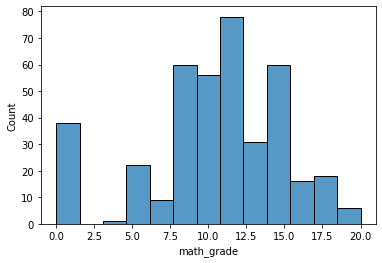

In [10]:
sns.histplot(x='math_grade', data = students)
plt.show()
plt.close()

`Base on our domain knowledge, there's no such grade as Zero maybe it's a drop student's. Why we include students who does not    go to our Math class in our computation? We will exclude this in getting our avg.`

In [11]:
# Location on where (array) are these Zero values
zero_value = np.where(students.math_grade == 0)
zero_value

(array([128, 130, 131, 134, 135, 136, 137, 140, 144, 146, 148, 150, 153,
        160, 162, 168, 170, 173, 221, 239, 242, 244, 259, 264, 269, 296,
        310, 316, 332, 333, 334, 337, 341, 343, 367, 383, 387, 389],
       dtype=int64),)

`Our interesting Value is Zero which has 38 records`

`Further inspection, we found that all students that has zero grade are also has no record in absences. This can mean that this students does not attend Math class at all.`

#### Remove all zero value in our math_grade

In [12]:
Student_No_Zero_Grade = students[students.math_grade > 0]
Student_No_Zero_Grade

,address,absences,Mjob,Fjob,math_grade
0,U,6,at_home,at_home,6
1,U,4,at_home,at_home,6
2,U,10,at_home,at_home,10
3,U,2,health,health,15
4,U,4,other,other,10
...,...,...,...,...,...
390,U,11,services,services,9
391,U,3,services,services,16
392,R,3,other,other,7
393,R,0,services,services,10


In [13]:
Student_No_Zero_Grade.shape

(357, 5)

### `Let's plot again, using our new student_No_Zero_Grade`

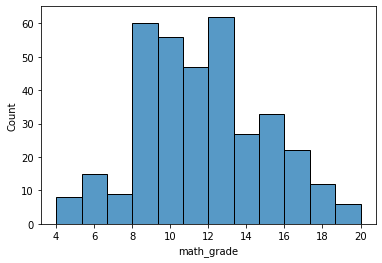

In [14]:
sns.histplot(x='math_grade', data = Student_No_Zero_Grade)
plt.show()
plt.close()

<AxesSubplot:xlabel='math_grade'>

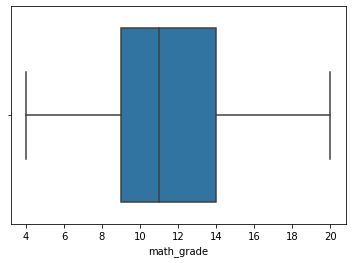

In [15]:
sns.boxplot(x='math_grade', data = Student_No_Zero_Grade)

In [16]:
# Average students grade 
Student_No_Zero_Grade.math_grade.mean()

11.523809523809524

In [17]:
# middle grade value
Student_No_Zero_Grade.math_grade.median()

11.0

In [18]:
Student_No_Zero_Grade.math_grade.mode()[0]

10

### Summary/Conclusion

1. The average grade of students is 11.52 (total of 357 sample)
2. There are 38 (10% of total students) students who has no record in their math class

In [19]:
# Student_No_Zero_Grade.math_grade.describe()

## 2. `What do students’ parents do for work (Father)?`

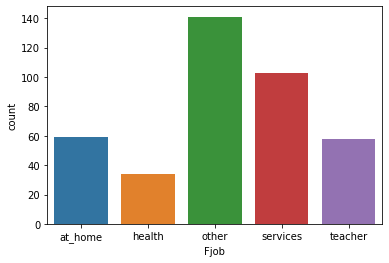

In [20]:
sns.countplot(x='Fjob', data = students)
plt.show()
plt.close()

In [21]:
# In categorical variable it best to show it in proportion rather than number
round(students.Fjob.value_counts(normalize=True) * 100, 2)

other       35.70
services    26.08
at_home     14.94
teacher     14.68
health       8.61
Name: Fjob, dtype: float64

<AxesSubplot:xlabel='Fjob', ylabel='math_grade'>

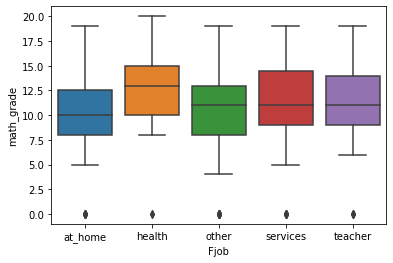

In [22]:
sns.boxplot(data = students, x = 'Fjob', y = 'math_grade')

### Summary/Conclusion


1. 35% of students father are unspecified
2. 26% are in Services Industry
3. Students perform well better with their fathers in health industry

## 3. `How often are students absent from Math class?`

Spread for Quantitative Data

In [28]:
students[ students.absences > upper  ]

,address,absences,Mjob,Fjob,math_grade
40,U,25,other,other,11
74,U,54,other,other,11
103,U,26,services,services,6
183,U,56,other,other,8
198,U,24,services,services,18
205,U,28,at_home,at_home,9
216,U,22,other,other,4
260,U,21,services,services,18
276,R,75,other,other,9
277,U,22,teacher,teacher,9


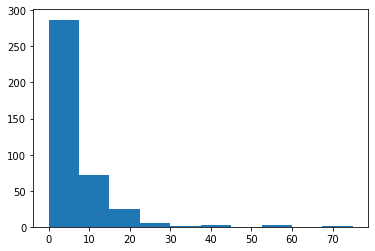

In [47]:
plt.hist(x='absences', data = students)
plt.show()
plt.close()

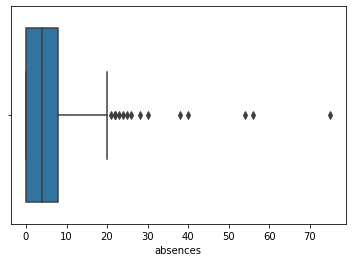

In [30]:
sns.boxplot(x='absences', data = students)
plt.show()
#plt.close()

In [43]:
#define functions

def showoutliers(df, column_name = ""):
        iqr = df[column_name].quantile(.75) - df[column_name].quantile(.25)
        lowerbound = (df[column_name].quantile(.25)) - iqr * 1.5
        upperbound = (df[column_name].quantile(.75)) + iqr * 1.5
        lowerbound_outliers = df[df[column_name] < lowerbound]
        higherbound_outliers = df[df[column_name] > upperbound]
        outliers = pd.concat([lowerbound_outliers,higherbound_outliers])
        return outliers

def countoutliers(df, column_name = ""):
        iqr = df[column_name].quantile(.75) - df[column_name].quantile(.25)
        lowerbound = (df[column_name].quantile(.25)) - iqr * 1.5
        upperbound = (df[column_name].quantile(.75)) + iqr * 1.5
        lowerbound_outliers = df[df[column_name] < lowerbound]
        higherbound_outliers = df[df[column_name] > upperbound]
        outliers = pd.concat([lowerbound_outliers,higherbound_outliers])
        count = len(outliers)
        print(f'{column_name} outlier count: {count}')

In [44]:
countoutliers(students, 'absences')

absences outlier count: 15


In [45]:
showoutliers(students, 'absences')

,address,absences,Mjob,Fjob,math_grade
40,U,25,other,other,11
74,U,54,other,other,11
103,U,26,services,services,6
183,U,56,other,other,8
198,U,24,services,services,18
205,U,28,at_home,at_home,9
216,U,22,other,other,4
260,U,21,services,services,18
276,R,75,other,other,9
277,U,22,teacher,teacher,9


In [32]:
# Range
students.absences.max() - students.absences.min()

75

#### `Our STD and range is a bit too large..`

# IQR

In [33]:
Q1 = students.absences.quantile(0.25) #0
Q3 = students.absences.quantile(0.75) #8
IQR = Q3 - Q1 #8

lower = Q1 - 1.5 * IQR #-1
upper = Q3 + 1.5 * IQR #20


#### `Since there's no record lower than -1, we will not include lower in getting our outliers.`


### `Our upper boundary is 20, so any value larger than 20 will`
### `not included in our new dataframe`

#### `This is our new dataframe without outliers`

In [34]:
students_absences_clean = students[ students.absences < upper ]
students_absences_clean

,address,absences,Mjob,Fjob,math_grade
0,U,6,at_home,at_home,6
1,U,4,at_home,at_home,6
2,U,10,at_home,at_home,10
3,U,2,health,health,15
4,U,4,other,other,10
...,...,...,...,...,...
390,U,11,services,services,9
391,U,3,services,services,16
392,R,3,other,other,7
393,R,0,services,services,10


### `Let's plot again, using our new students_absences_clean`

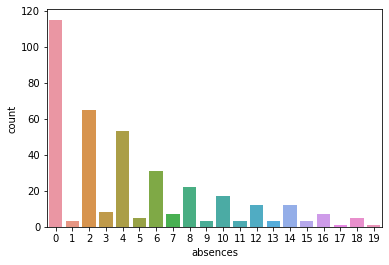

In [35]:
sns.countplot(x='absences', data = students_absences_clean)
plt.show()
plt.close()

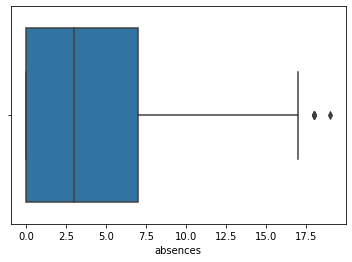

In [36]:
sns.boxplot(x='absences', data = students_absences_clean)
plt.show()
#plt.close()

In [37]:
students_absences_clean.absences.mean()

4.4388297872340425

In [38]:
students_absences_clean.absences.median()

3.0

### `The average absences is 4`


### Conclusion / Summary

Why tream_mean not working????

## Extra's

#### Is Absences related to grade?

#### `Relation between ordinal and quantitative variable.. ;)`
abseces vs. math_grade

In [39]:
students.shape

(395, 5)

Text(0, 0.5, 'Math Grade')

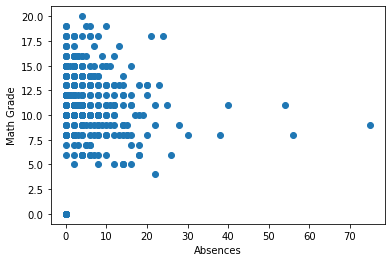

In [40]:
y = students.math_grade
x = students.absences

plt.scatter(x, y)
plt.xlabel('Absences')
plt.ylabel('Math Grade')


The less absence the higher the grade?

### `Covariance`

In [41]:
math_grade_absences_cov = np.cov(x,y)
math_grade_absences_cov

array([[64.04954058,  1.25570263],
       [ 1.25570263, 20.9896164 ]])

### `Corelation`

#### `Generally, a correlation larger than about .3 indicates a linear association.
 A correlation greater than about .6 suggestions a strong linear association.`

In [42]:
corr_mathGrade_absences, p = pearsonr(x,y)
corr_mathGrade_absences

0.03424731615006936